#### Q5a. Linear Regression – Fish
- Read the fish dataset from fish.csv.
- Get a summary of numerical features
- Get a matrix of correlation coefficients between the variables
- Draw a matrix of scatterplots.
- Which input variables correlate the most strongly with weight?
- Split data into training and test data.
- Build a linear regression model for weight in terms of the other numeric input variables.
- Print out the intercept and the coefficients of the input variables.
- Print out the values of R2 and RMSE.

In [27]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error

df = pd.read_csv("../data/fish.csv")
print(df.head())
print(df.columns)
print(df.shape)

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')
(159, 7)


#### Get a summary of numerical features

In [28]:
print(df.describe())

            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000


#### Get a matrix of correlation coefficients between the variables

In [29]:
print(df.corr(numeric_only=True))

           Weight   Length1   Length2   Length3    Height     Width
Weight   1.000000  0.915712  0.918618  0.923044  0.724345  0.886507
Length1  0.915712  1.000000  0.999517  0.992031  0.625378  0.867050
Length2  0.918618  0.999517  1.000000  0.994103  0.640441  0.873547
Length3  0.923044  0.992031  0.994103  1.000000  0.703409  0.878520
Height   0.724345  0.625378  0.640441  0.703409  1.000000  0.792881
Width    0.886507  0.867050  0.873547  0.878520  0.792881  1.000000


array([[<Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Length1', ylabel='Weight'>,
        <Axes: xlabel='Length2', ylabel='Weight'>,
        <Axes: xlabel='Length3', ylabel='Weight'>,
        <Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='Width', ylabel='Weight'>],
       [<Axes: xlabel='Weight', ylabel='Length1'>,
        <Axes: xlabel='Length1', ylabel='Length1'>,
        <Axes: xlabel='Length2', ylabel='Length1'>,
        <Axes: xlabel='Length3', ylabel='Length1'>,
        <Axes: xlabel='Height', ylabel='Length1'>,
        <Axes: xlabel='Width', ylabel='Length1'>],
       [<Axes: xlabel='Weight', ylabel='Length2'>,
        <Axes: xlabel='Length1', ylabel='Length2'>,
        <Axes: xlabel='Length2', ylabel='Length2'>,
        <Axes: xlabel='Length3', ylabel='Length2'>,
        <Axes: xlabel='Height', ylabel='Length2'>,
        <Axes: xlabel='Width', ylabel='Length2'>],
       [<Axes: xlabel='Weight', ylabel='Length3'>,
        <Axes: xlabel='Lengt

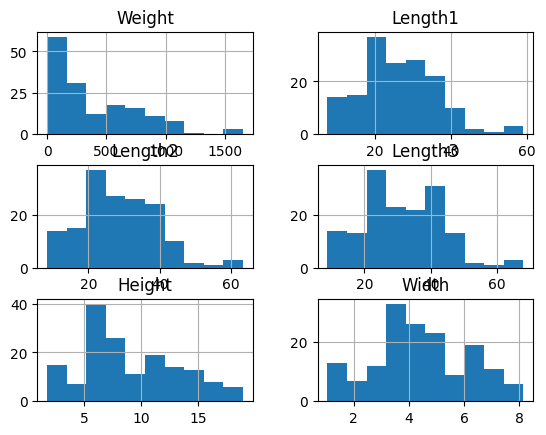

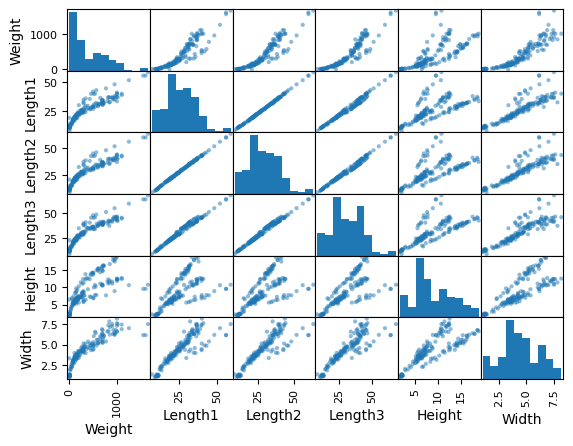

In [30]:
df.hist()
scatter_matrix(df)

#### Split data into training and test data.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

X = df.drop("Species", axis = 'columns')
y = df["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_test.describe(), y_test.describe())





(119, 6) (119,)
(40, 6) (40,)
            Weight    Length1    Length2    Length3     Height      Width
count    40.000000  40.000000  40.000000  40.000000  40.000000  40.000000
mean    309.575000  23.610000  25.565000  28.105000   8.196123   4.094705
std     316.223057   8.717645   9.399988  10.252128   4.335888   1.747036
min       6.700000   9.300000   9.800000  10.800000   1.738800   1.047600
25%     110.000000  18.550000  20.000000  22.350000   5.634150   3.293925
50%     160.000000  21.150000  22.750000  25.400000   6.736450   3.761500
75%     390.000000  31.100000  33.625000  37.425000  11.496300   5.087000
max    1100.000000  40.100000  43.000000  46.500000  18.635400   7.795700 count        40
unique        6
top       Perch
freq         15
Name: Species, dtype: object


In [33]:
X = df.drop(["Species","Weight"], axis = 'columns')
y = df["Weight"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LinearRegression()
model.fit(X_test, y_test)

print("Intercept:" ,model.intercept_)
print("Slope:", model.coef_)
print("RSquared:", model.score(X,y))

y_hat = model.predict(X_test)
print("RMSE:",root_mean_squared_error(y_test, y_hat))



Intercept: -434.27473654017297
Slope: [109.60407549 -85.62065114  -5.3902499   23.36405425  77.54415272]
RSquared: 0.8631198407760735
RMSE: 98.6941355843641


#### Q5b. (Multiple) Linear Regression – Fish
- Build a model where the weight depends on all the other variables including species.
- Onehot encode the data using X = pd.get_dummies(X).
- Compare the R2 and RMSE with the values obtained without Species.

In [42]:
X = df.drop("Weight", axis='columns')
y = df["Weight"]
print(X.head())
X = pd.get_dummies(X)
X.tail()
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_)
print("RSquared:", model.score(X,y))
y_hat = model.predict(X_test)
print("RMSE:",root_mean_squared_error(y_test, y_hat))




  Species  Length1  Length2  Length3   Height   Width
0   Bream     23.2     25.4     30.0  11.5200  4.0200
1   Bream     24.0     26.3     31.2  12.4800  4.3056
2   Bream     23.9     26.5     31.1  12.3778  4.6961
3   Bream     26.3     29.0     33.5  12.7300  4.4555
4   Bream     26.5     29.0     34.0  12.4440  5.1340
Intercept: -809.1071327012902
Slope: [ -98.43569301   92.82068408   33.15987778   11.14786282    6.71126594
 -142.30245521   28.27174106   37.90844545 -224.72985417   19.38545181
  352.61655929  -71.14988822]
RSquared: 0.9336905759458896
RMSE: 101.49528256539597
